In [35]:
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
base_path = "../lido-run-events"

plt.rcParams["figure.autolayout"] = True

x_label = "Avg. Reached Simulation Timestep"
y_label = "Training Timestep"


smoothing_value = 12
step_size = 10000
max_timestep = int(3000000 / step_size)

# parameters = [(0.0, 0.0, 0.0, 0.0, 0.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.5, 1.5, 1.5, 1.5, 1.5), (2.0, 2.0, 2.0, 2.0, 2.0)]
# parameters = [(1.0, 0.0, 0.0, 0.0, 0.0), (0.0, 1.0, 0.0, 0.0, 0.0), (0.0, 0.0, 1.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0, 0.0), (0.0, 0.0, 0.0, 0.0, 1.0)]
# parameters = [(0.0, 0.0, 1.0, 0.0, 0.0), (0.0, 0.0, 2.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0, 0.0), (0.0, 0.0, 0.0, 2.0, 0.0), (0.0, 0.0, 1.0, 1.0, 0.0), (0.0, 0.0, 2.0, 2.0, 0.0)]
# parameters = [(0.0, 0.0, 1.0, 0.0, 0.0), (2.0, 0.0, 1.0, 0.0, 0.0), (0.0, 2.0, 1.0, 0.0, 0.0), (0.0, 0.0, 1.0, 1.5, 0.0), (0.0, 0.0, 1.0, 0.0, 1.5)]
# parameters = [(0.0, 0.0, 1.0, 1.5, 0.0), (2.0, 0.0, 1.0, 0.0, 0.0), (0.0, 2.0, 1.0, 1.0, 2.0), (0.0, 0.0, 1.0, 1.5, 1.0), (0.0, 0.0, 1.0, 1.5, 1.5)]
# parameters = [(0.0, 0.0, 1.0, 1.5, 0.0), (1.0, 0.0, 1.0, 1.5, 0.0), (1.5, 0.0, 1.0, 1.5, 0.0), (2.0, 0.0, 1.0, 1.5, 0.0)]
parameters = [(0.0, 0.0, 1.0, 0.0, 0.0), (1.0, 0.0, 1.0, 0.0, 0.0), (1.5, 0.0, 1.0, 0.0, 0.0), (2.0, 0.0, 1.0, 0.0, 0.0)]
legend_labels = ["s={}, c={}, w={}, mw={}, t={}".format(p[0], p[1], p[2], p[3], p[4]) for p in parameters]
colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 1, 0), (0, 1, 1), (1, 0, 1)]

In [37]:
datas = []
for param in parameters:
    data_path = "{}/run-s{}c{}w{}mw{}t{}.csv".format(base_path, param[0], param[1], param[2], param[3], param[4])
    data = pd.read_csv(data_path)
    data = data[:max_timestep]
    data["smoothed"] = data["Value"].ewm(span = smoothing_value).mean()
    datas.append(data)
datas[0]

,Wall time,Step,Value,smoothed
0,1.683199e+09,10000,19.614605,19.614605
1,1.683199e+09,20000,19.471909,19.537311
2,1.683199e+09,30000,19.044867,19.345110
3,1.683199e+09,40000,19.322809,19.338070
4,1.683199e+09,50000,19.261841,19.317359
...,...,...,...,...
295,1.683211e+09,2960000,546.685608,538.937979
296,1.683212e+09,2970000,506.860107,534.002921
297,1.683212e+09,2980000,511.552460,530.549004
298,1.683212e+09,2990000,485.557434,523.627224


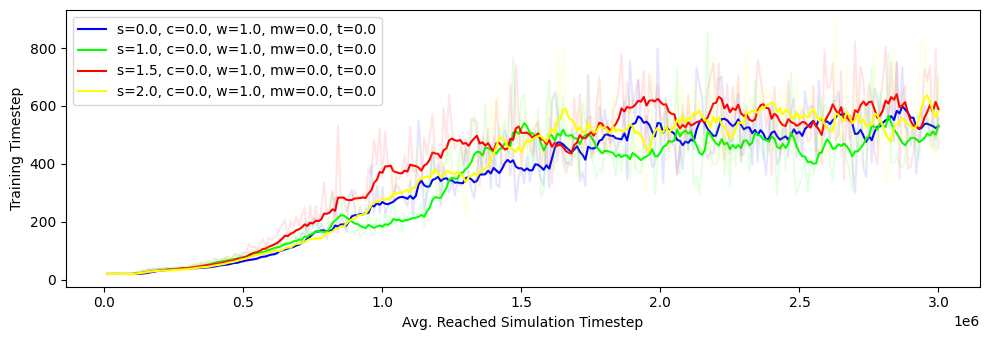

In [38]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
for idx, data in enumerate(datas):
    plt.plot(data.Step, data.Value, color=colors[idx] + (0.1,))
    plt.plot(data.Step, data.smoothed, color=colors[idx] + (1.0,), label=legend_labels[idx])

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend()

fig = plt.gcf()
fig.savefig('saved_figure.png', transparent=True, dpi=500)

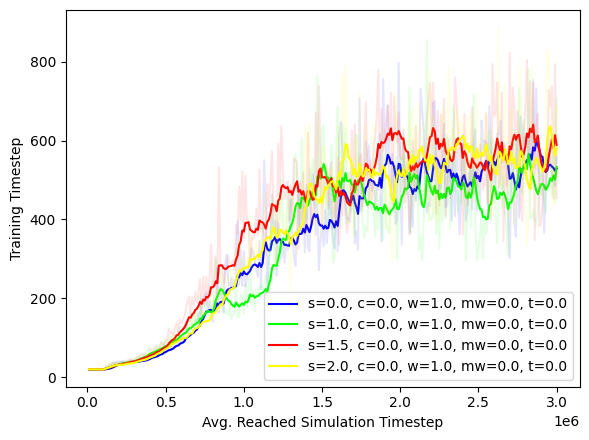

In [39]:
plt.rcParams["figure.figsize"] = [6.00, 4.5]
for idx, data in enumerate(datas):
    plt.plot(data.Step, data.Value, color=colors[idx] + (0.1,))
    plt.plot(data.Step, data.smoothed, color=colors[idx] + (1.0,), label=legend_labels[idx])

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend()
fig = plt.gcf()
fig.savefig('saved_figure_small.png', transparent=True, dpi=500)